In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Hall/Hall_data.csv", sep=",") # pre-processed by removing entry "Low"
#data

In [12]:
data['Display Time'] = pd.to_datetime(data['Display Time'])
data['GlucoseValue'] = pd.to_numeric(data['GlucoseValue'])
xx = data[data['subjectId'] == "1636-69-032"]
xx.dtypes

Display Time    datetime64[ns]
GlucoseValue             int64
subjectId               object
dtype: object

In [13]:
xx

,Display Time,GlucoseValue,subjectId
5185,2016-01-13 12:58:17,122,1636-69-032
5186,2016-01-13 13:03:17,123,1636-69-032
5187,2016-01-13 13:08:17,124,1636-69-032
5188,2016-01-13 13:13:17,128,1636-69-032
5189,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
6963,2016-01-19 17:12:49,101,1636-69-032
6964,2016-01-19 17:17:49,98,1636-69-032
6965,2016-01-19 17:22:49,101,1636-69-032
6966,2016-01-19 17:27:49,106,1636-69-032


[Text(0, 0, '2016-01-13 12:58:17'),
 Text(0, 0, '2016-01-13 13:03:17'),
 Text(0, 0, '2016-01-13 13:08:17'),
 Text(0, 0, '2016-01-13 13:13:17'),
 Text(0, 0, '2016-01-13 13:18:17'),
 Text(0, 0, '2016-01-13 13:23:17'),
 Text(0, 0, '2016-01-13 13:28:17')]

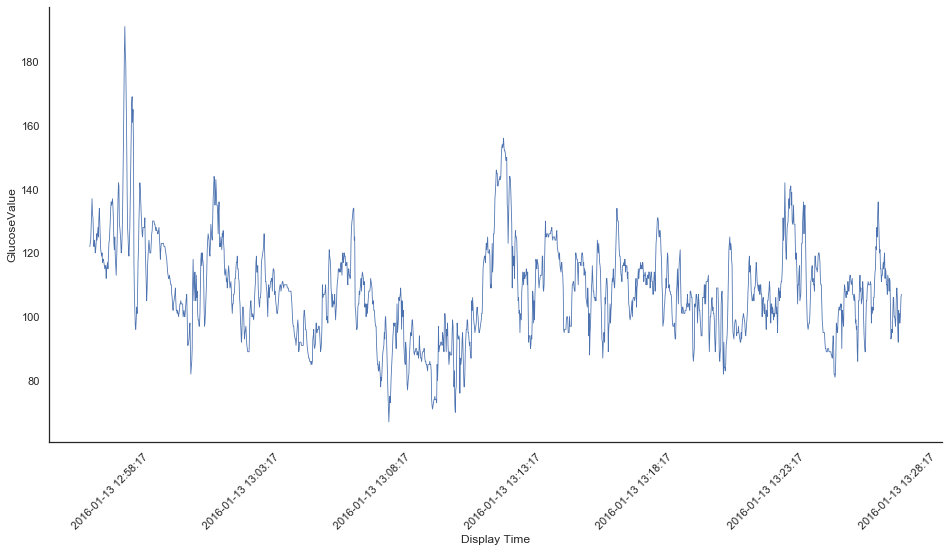

In [14]:
plt.figure(figsize=(16,8))
sns.set(style="white")
fig = sns.lineplot(x = xx['Display Time'], y = xx['GlucoseValue'],
             data=xx, palette="tab10", linewidth=0.8)
sns.despine()
fig.set_xticklabels(labels=xx['Display Time'], rotation=45, ha='right')



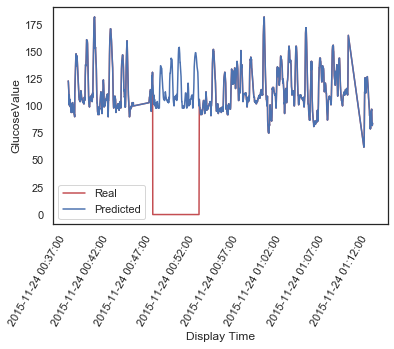

<Figure size 1152x576 with 0 Axes>

In [43]:
%matplotlib inline
fig, ax = plt.subplots()
plt.figure(figsize=(16,8))

sns.lineplot(x = xx['Display Time'], y = xx['GlucoseValue'],
             data=xx, ax=ax, color='r', label = 'Real')
sns.lineplot(x = yy['Display Time'], y = yy['GlucoseValue'],
             data=yy, ax=ax, color='b', label = 'Predicted')
labels = ax.get_xticklabels() 

ax.set_xticklabels(labels=yy['Display Time'], rotation=60, ha='right')
plt.show()

In [15]:
import pandas as pd
import random
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import random
import re
from dateutil.parser import parse

import warnings  
warnings.filterwarnings('ignore')

import os

In [16]:
def createGap(df,start,end):
    """
    Creating a Gap
    input:
        start: seed
        end: seed + gap
    output:
        df: dataframe with index => DisplayTime value => GlucoseValues and a gap from start to end (inputs)
    """

    #df = readData()
    l = len(df.index)
    if end>l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]=0
    
    return df

In [17]:
glucoCheckObject.train()

Training Model...


Epoch 1/1
200017/200017 [==============================] - 1268s 6ms/step - loss: 5.8082e-04
Model trained successfully!


In [24]:
yy = xx.copy()
yy = yy.reset_index(drop=True)
yy

,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122,1636-69-032
1,2016-01-13 13:03:17,123,1636-69-032
2,2016-01-13 13:08:17,124,1636-69-032
3,2016-01-13 13:13:17,128,1636-69-032
4,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101,1636-69-032
1779,2016-01-19 17:17:49,98,1636-69-032
1780,2016-01-19 17:22:49,101,1636-69-032
1781,2016-01-19 17:27:49,106,1636-69-032


In [25]:
yy = createGap(yy,450,650)
yy['GlucoseValue']

0       122
1       123
2       124
3       128
4       133
       ... 
1778    101
1779     98
1780    101
1781    106
1782    107
Name: GlucoseValue, Length: 1783, dtype: int64

[Text(0, 0, '2016-01-13 12:58:17'),
 Text(0, 0, '2016-01-13 13:03:17'),
 Text(0, 0, '2016-01-13 13:08:17'),
 Text(0, 0, '2016-01-13 13:13:17'),
 Text(0, 0, '2016-01-13 13:18:17'),
 Text(0, 0, '2016-01-13 13:23:17'),
 Text(0, 0, '2016-01-13 13:28:17')]

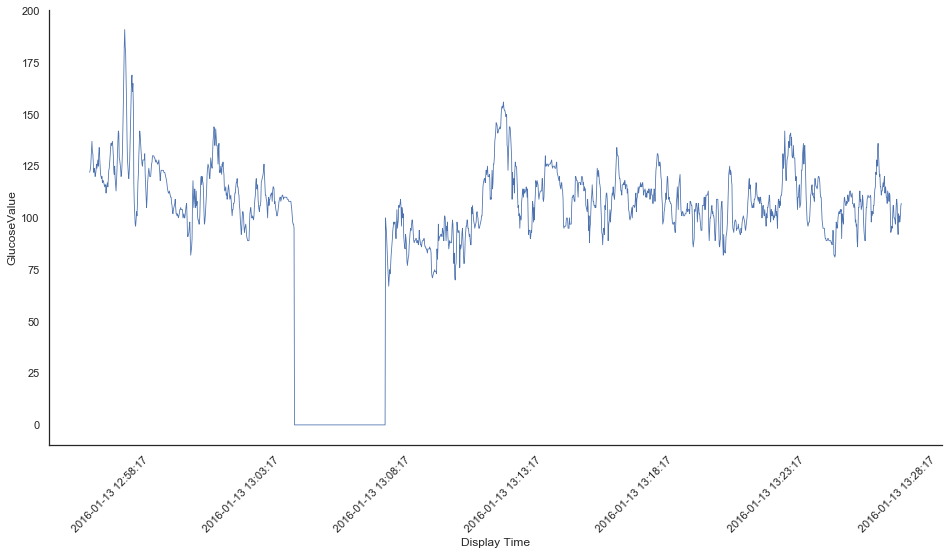

In [26]:
yy['Display Time'] = pd.to_datetime(yy['Display Time'])
yy['GlucoseValue'] = pd.to_numeric(yy['GlucoseValue'])
plt.figure(figsize=(16,8))
sns.set(style="white")
fig = sns.lineplot(x = yy['Display Time'], y = yy['GlucoseValue'],
             data=yy, palette="tab10", linewidth=0.8)
sns.despine()
fig.set_xticklabels(labels=yy['Display Time'], rotation=45, ha='right')


In [29]:
zz = glucoCheckObject.impute(yy,1)
zz.reset_index(level=0, inplace=True)
zz

,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122,1636-69-032
1,2016-01-13 13:03:17,123,1636-69-032
2,2016-01-13 13:08:17,124,1636-69-032
3,2016-01-13 13:13:17,128,1636-69-032
4,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101,1636-69-032
1779,2016-01-19 17:17:49,98,1636-69-032
1780,2016-01-19 17:22:49,101,1636-69-032
1781,2016-01-19 17:27:49,106,1636-69-032


[Text(0, 0, '2016-01-13 12:58:17'),
 Text(0, 0, '2016-01-13 13:03:17'),
 Text(0, 0, '2016-01-13 13:08:17'),
 Text(0, 0, '2016-01-13 13:13:17'),
 Text(0, 0, '2016-01-13 13:18:17'),
 Text(0, 0, '2016-01-13 13:23:17'),
 Text(0, 0, '2016-01-13 13:28:17')]

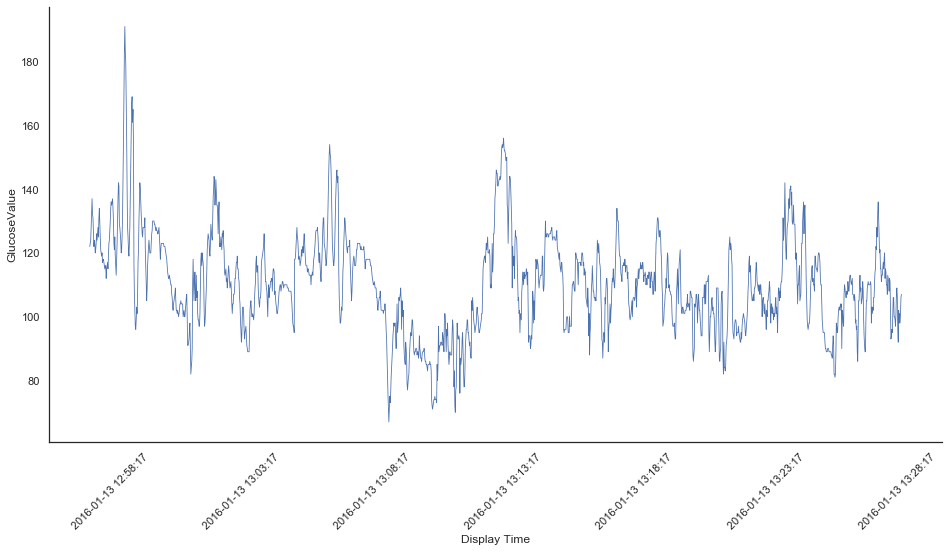

In [30]:
zz['Display Time'] = pd.to_datetime(zz['Display Time'])
zz['GlucoseValue'] = pd.to_numeric(zz['GlucoseValue'])
plt.figure(figsize=(16,8))
sns.set(style="white")
fig = sns.lineplot(x = zz['Display Time'], y = zz['GlucoseValue'],
             data=zz, palette="tab10", linewidth=0.8)
sns.despine()
fig.set_xticklabels(labels=zz['Display Time'], rotation=45, ha='right')

[Text(0, 0, '2016-01-13 12:58:17'),
 Text(0, 0, '2016-01-13 13:03:17'),
 Text(0, 0, '2016-01-13 13:08:17'),
 Text(0, 0, '2016-01-13 13:13:17'),
 Text(0, 0, '2016-01-13 13:18:17'),
 Text(0, 0, '2016-01-13 13:23:17'),
 Text(0, 0, '2016-01-13 13:28:17')]

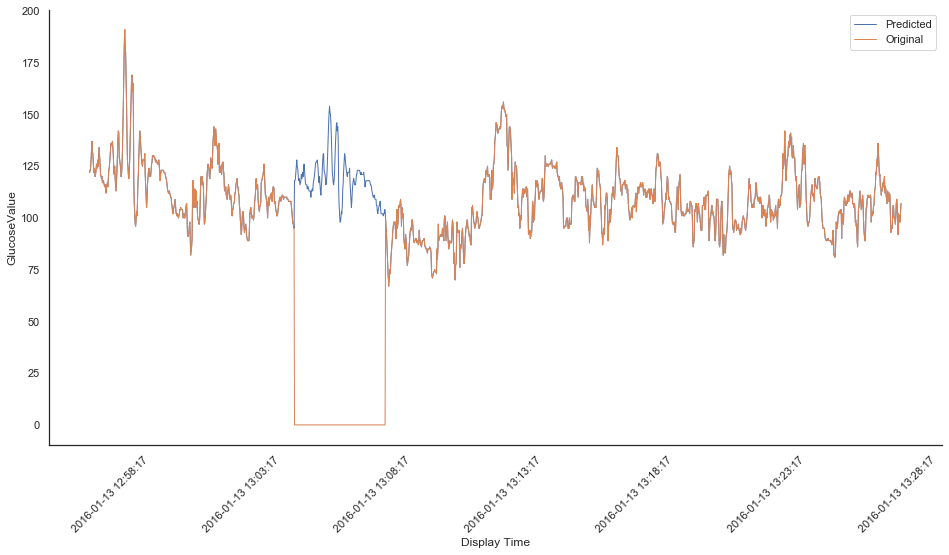

In [32]:

plt.figure(figsize=(16,8))
sns.set(style="white")
fig = sns.lineplot(x = zz['Display Time'], y = zz['GlucoseValue'],
             data=zz, palette="tab10", linewidth=1, label='Predicted')
fig = sns.lineplot(x = yy['Display Time'], y = yy['GlucoseValue'],
             data=yy, palette="tab10", linewidth=1, label='Original')
sns.despine()
fig.set_xticklabels(labels=zz['Display Time'], rotation=45, ha='right')